<a href="https://colab.research.google.com/github/Himanshu420247/project/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np


In [138]:

Data=pd.read_csv('https://raw.githubusercontent.com/Himanshu420247/project/refs/heads/main/diabetes.csv')
Data.head()
data=Data.drop('Outcome',axis=1)
outc=Data["Outcome"]
# outc
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [139]:
x_train,x_test,y_train,y_test=train_test_split(data,outc,test_size=0.2,random_state=42)
ct=make_column_transformer(
    (MinMaxScaler(),['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']),
    # (OneHotEncoder(handle_unknown="ignore"),['Designation','Experience','Employment_Status','Employee_Location','Company_Location','Company_Size'])
)
# data=Data.drop('Outcome',axis=1)
outc=Data["Outcome"]

X=Data.drop("Outcome",axis=1)

y=Data["Outcome"]
X_train,X_test,Y_train,Y_test=train_test_split(data,outc,test_size=0.2,random_state=42)


ct.fit(X_train)
x_train_normal=ct.transform(X_train)

x_test_normal=ct.transform(X_test)
x_train[:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
340,1,130,70,13,105,25.9,0.472,22
535,4,132,0,0,0,32.9,0.302,23
306,10,161,68,23,132,25.5,0.326,47
718,1,108,60,46,178,35.5,0.415,24
90,1,80,55,0,0,19.1,0.258,21


In [140]:
Pregnancies=5
Glucose=121
BloodPressure=70
SkinThickness=27
Insulin=0
BMI=38.8
DiabetesPedigreeFunction=0.34
Age=27
test={'Pregnancies':[Pregnancies],'Glucose':[Glucose],'BloodPressure':[BloodPressure],'SkinThickness':[SkinThickness],'Insulin':[Insulin],'BMI':[BMI],'DiabetesPedigreeFunction':[DiabetesPedigreeFunction],'Age':[Age]}
# test=ct.fit(tf.expand_dims(
#     test, axis=1
# ))
df=pd.DataFrame(test)
df=ct.transform(df)

In [141]:
# x_train_normal.toarray()
YY=np.array(y_train)
# Y_test=np.array(y_test)


In [142]:

tf.random.set_seed(42)
model=tf.keras.Sequential([
    # tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation="sigmoid"),
  ]
)
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
                loss = tf.keras.losses.binary_crossentropy,
                metrics=['accuracy'])
model.fit(x_train_normal,YY,epochs=100,verbose=1)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6625 - loss: 0.6525
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6926 - loss: 0.5962   
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7045 - loss: 0.5526 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7063 - loss: 0.5367 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7299 - loss: 0.5072 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7213 - loss: 0.5117  
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7338 - loss: 0.4984 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7540 - loss: 0.4953 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7589 - loss: 0.4946  
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7574 - loss: 0.4856 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7651 - loss: 0.4903 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [143]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 100)                 │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,095 (23.81 KB)

 Trainable params: 2,031 (7.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,064 (15.88 KB)

In [144]:
# pd.DataFrame(history.history).plot()
# plt.ylabel('loss')
# plt.xlabel('epochs')
x=model.predict(df)
print(x)
print(tf.math.round(x))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
[[0.5900326]]
tf.Tensor([[1.]], shape=(1, 1), dtype=float32)


In [145]:

model.evaluate(x_test_normal,Y_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5863 - loss: 0.8731


[0.8280398845672607, 0.6168830990791321]

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_normal, Y_train)

# Predictions and accuracy
y_pred_dt = dt_model.predict(x_test_normal)
print("Decision Tree Accuracy:", accuracy_score(Y_test, y_pred_dt))


Decision Tree Accuracy: 0.7467532467532467


In [147]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_normal, Y_train)

# Predictions and accuracy
y_pred_rf = rf_model.predict(x_test_normal)
print("Random Forest Accuracy:", accuracy_score(Y_test, y_pred_rf))


Random Forest Accuracy: 0.7207792207792207


In [148]:
from sklearn.svm import SVC

# Initialize and train model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train_normal, Y_train)

# Predictions and accuracy
y_pred_svm = svm_model.predict(x_test_normal)
print("SVM Accuracy:", accuracy_score(Y_test, y_pred_svm))


SVM Accuracy: 0.7597402597402597


In [149]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(x_train_normal, Y_train)

# Predictions and evaluation
y_pred_lr = lr_model.predict(x_test_normal)
y_pred_lr_class = np.round(y_pred_lr)  # Round to get 0 or 1
print("Linear Regression Accuracy:", accuracy_score(Y_test, y_pred_lr_class))


Linear Regression Accuracy: 0.7597402597402597


In [150]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize and fit model
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(x_train_normal)

# Predict cluster labels for test data
y_pred_kmeans = kmeans_model.predict(x_test_normal)

# Evaluate using silhouette score (higher is better)
silhouette_avg = silhouette_score(x_test_normal, y_pred_kmeans)
print("KMeans Silhouette Score:", silhouette_avg)


KMeans Silhouette Score: 0.25105225903311296


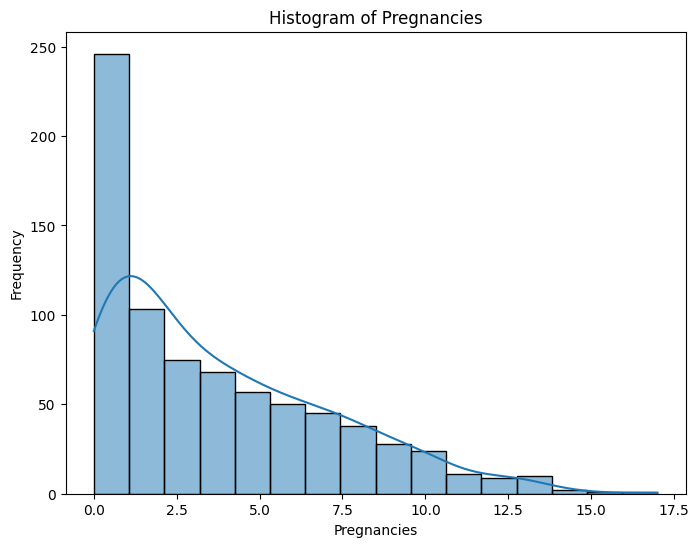

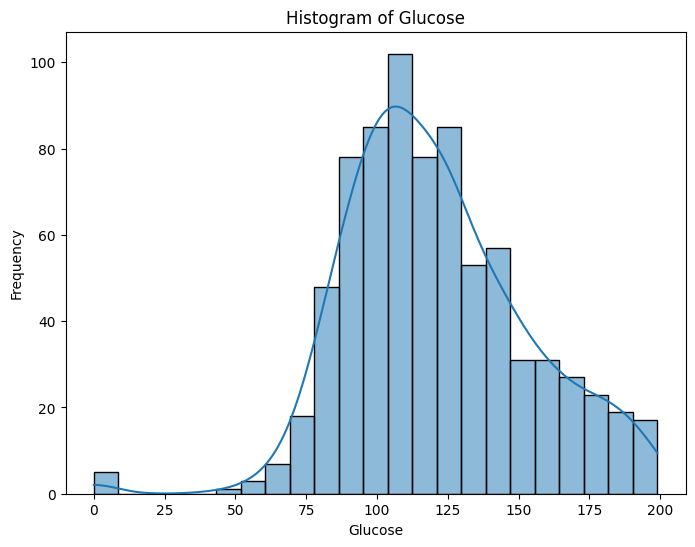

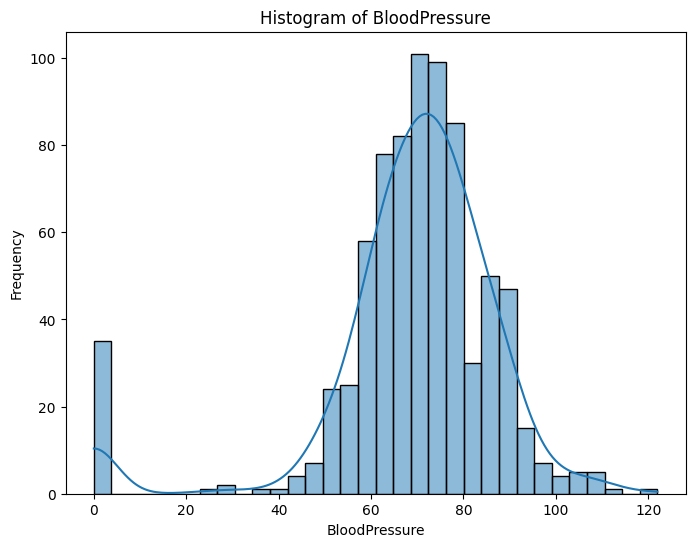

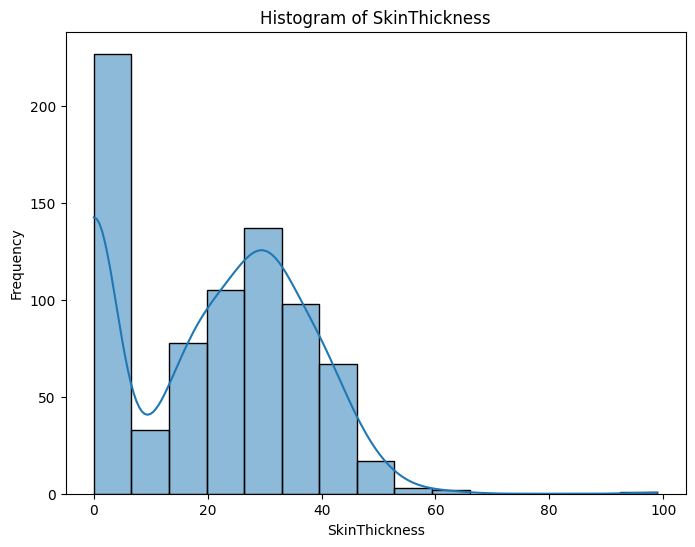

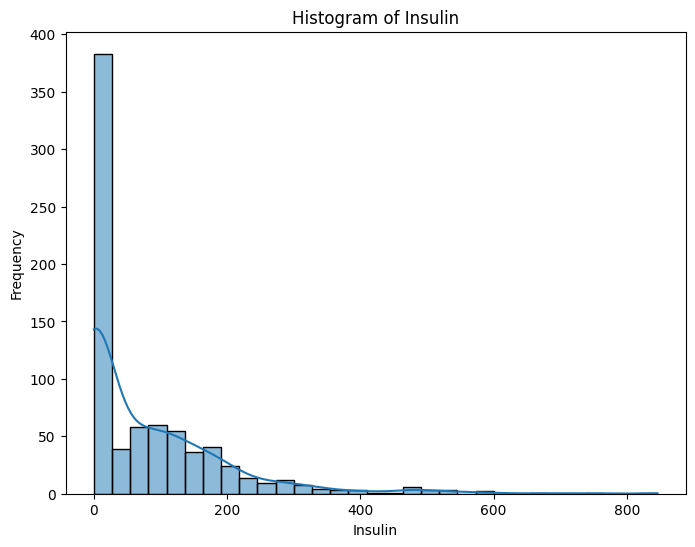

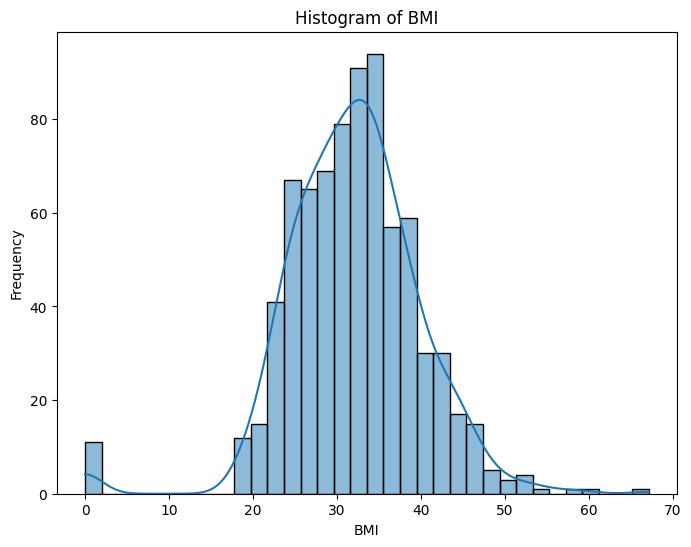

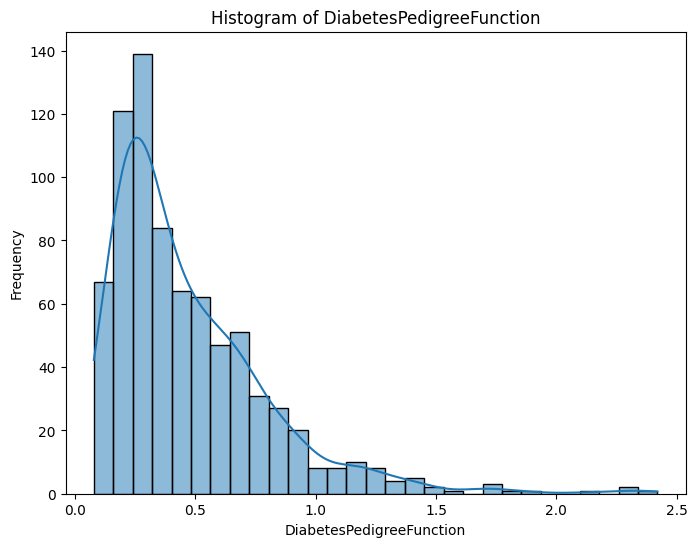

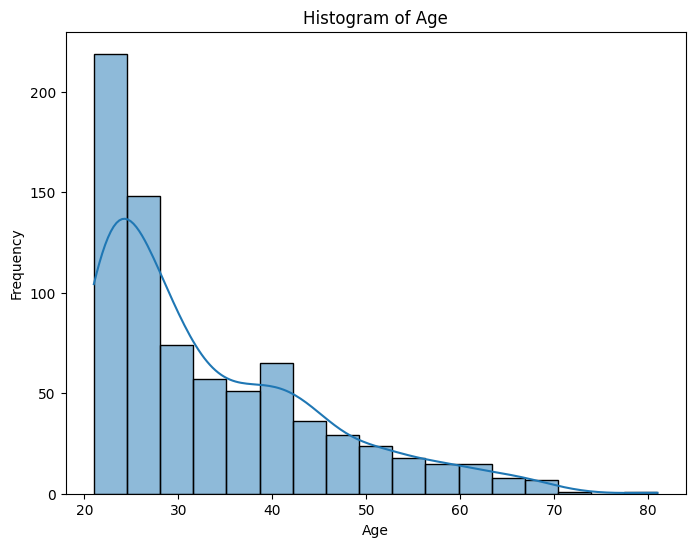

In [151]:
import seaborn as sns

# Plot histograms for each feature
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

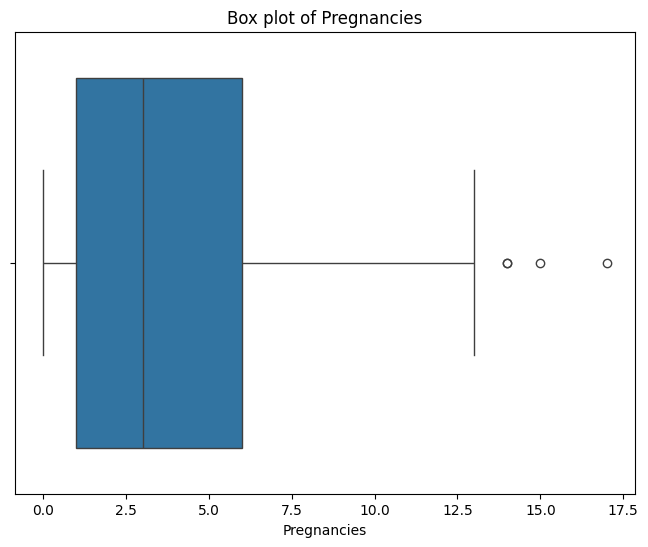

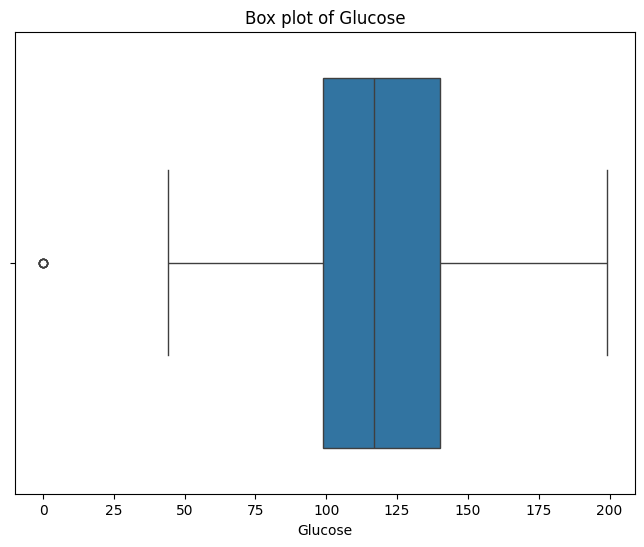

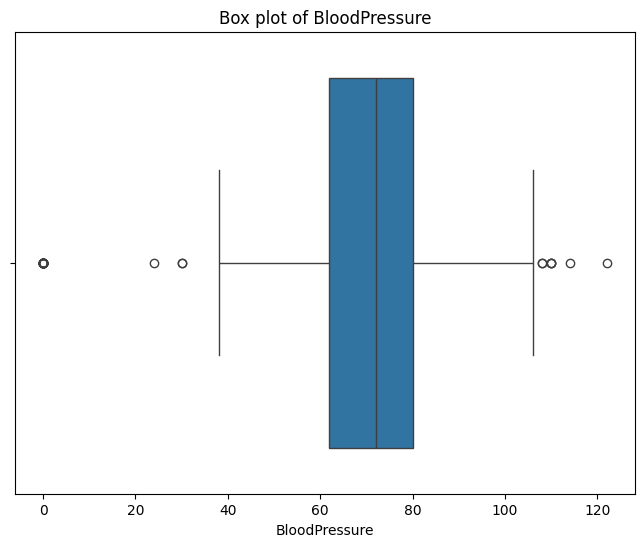

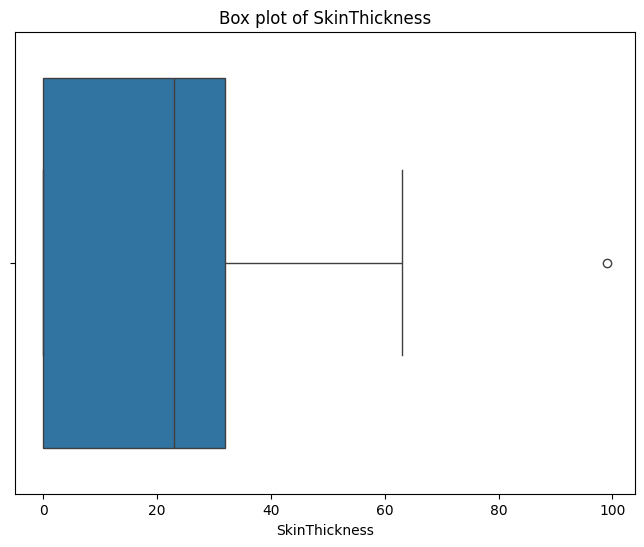

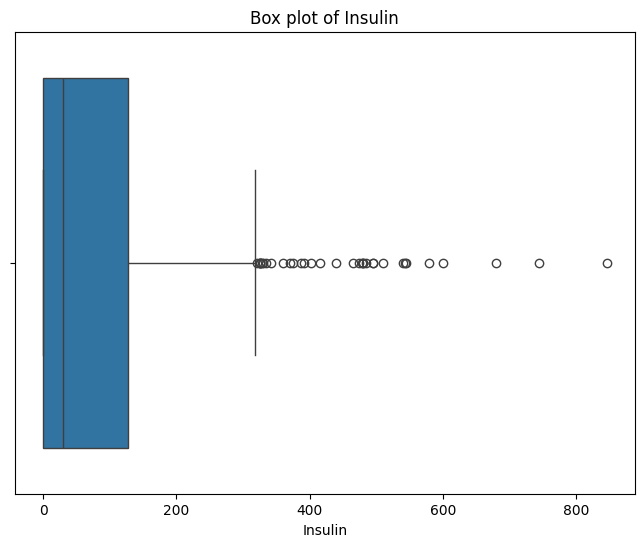

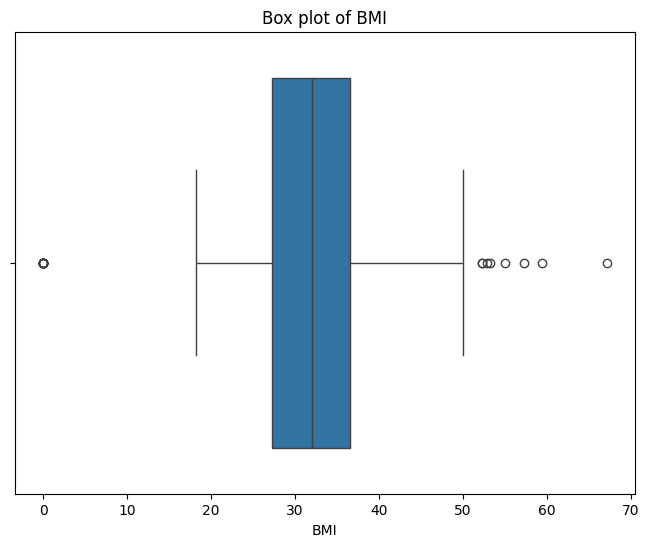

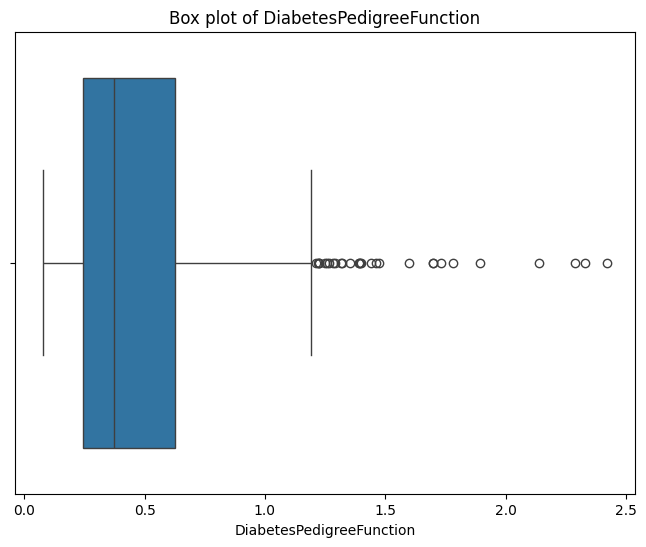

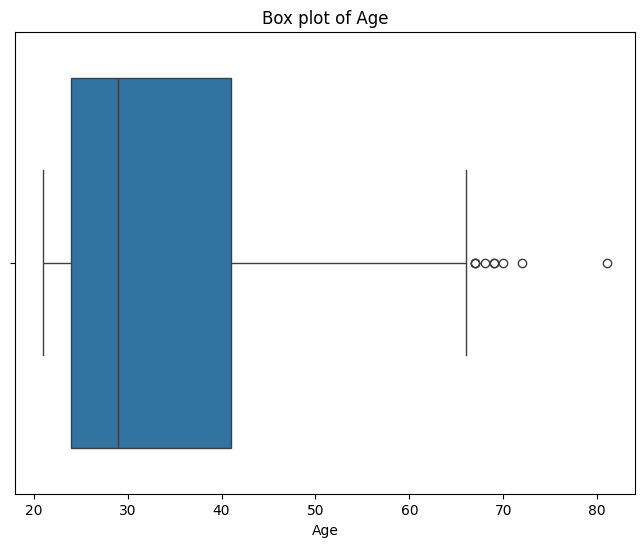

In [152]:
# Box plots for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[feature])
    plt.title(f"Box plot of {feature}")
    plt.xlabel(feature)
    plt.show()


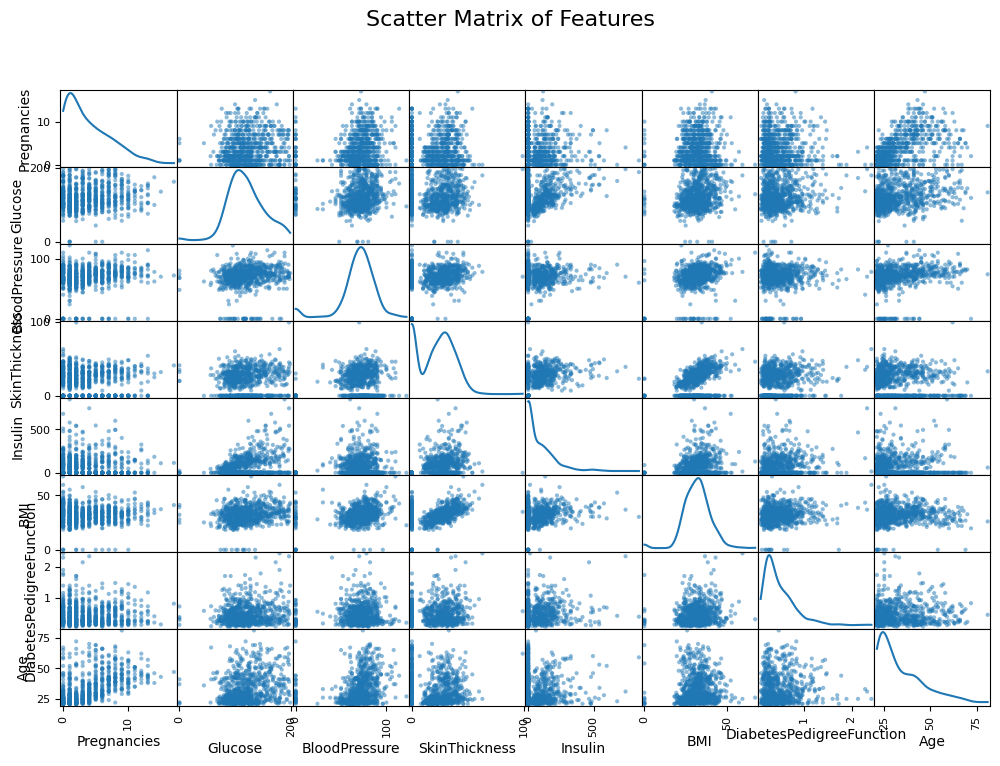

In [153]:
# Scatter matrix plot
from pandas.plotting import scatter_matrix

scatter_matrix(data[features], figsize=(12, 8), diagonal='kde')
plt.suptitle("Scatter Matrix of Features", fontsize=16)
plt.show()


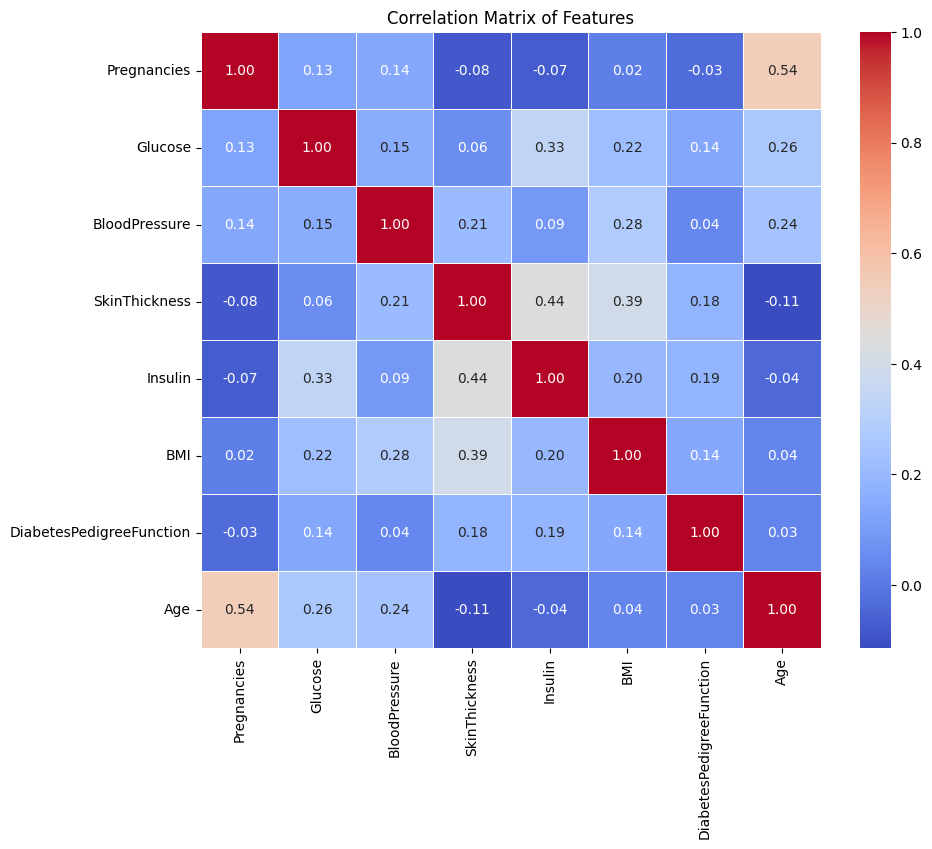

In [154]:
# Correlation matrix heatmap
correlation_matrix = data[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


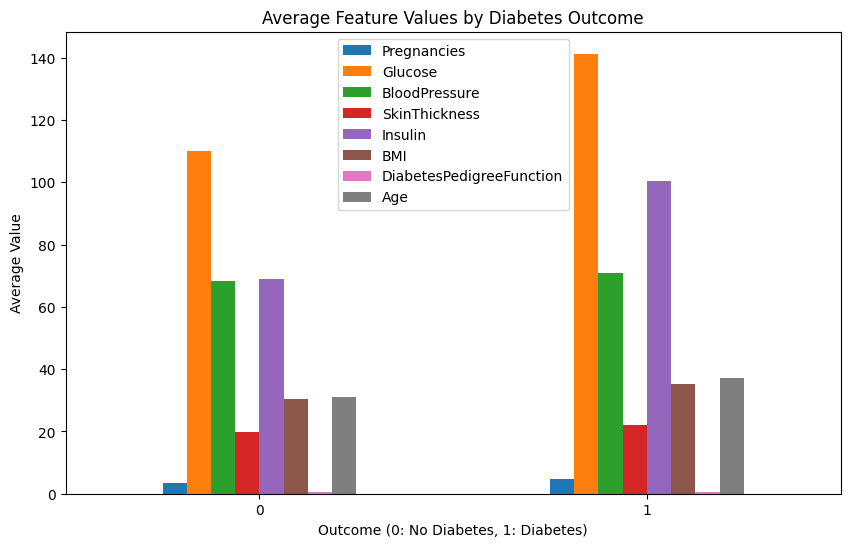

In [155]:
# Calculate average values of features based on Outcome using the original Data
average_diabetes = Data.groupby('Outcome').mean()

# Plot average diabetes by Outcome
average_diabetes.plot(kind='bar', figsize=(10, 6))
plt.title("Average Feature Values by Diabetes Outcome")
plt.ylabel("Average Value")
plt.xlabel("Outcome (0: No Diabetes, 1: Diabetes)")
plt.xticks(rotation=0)
plt.show()

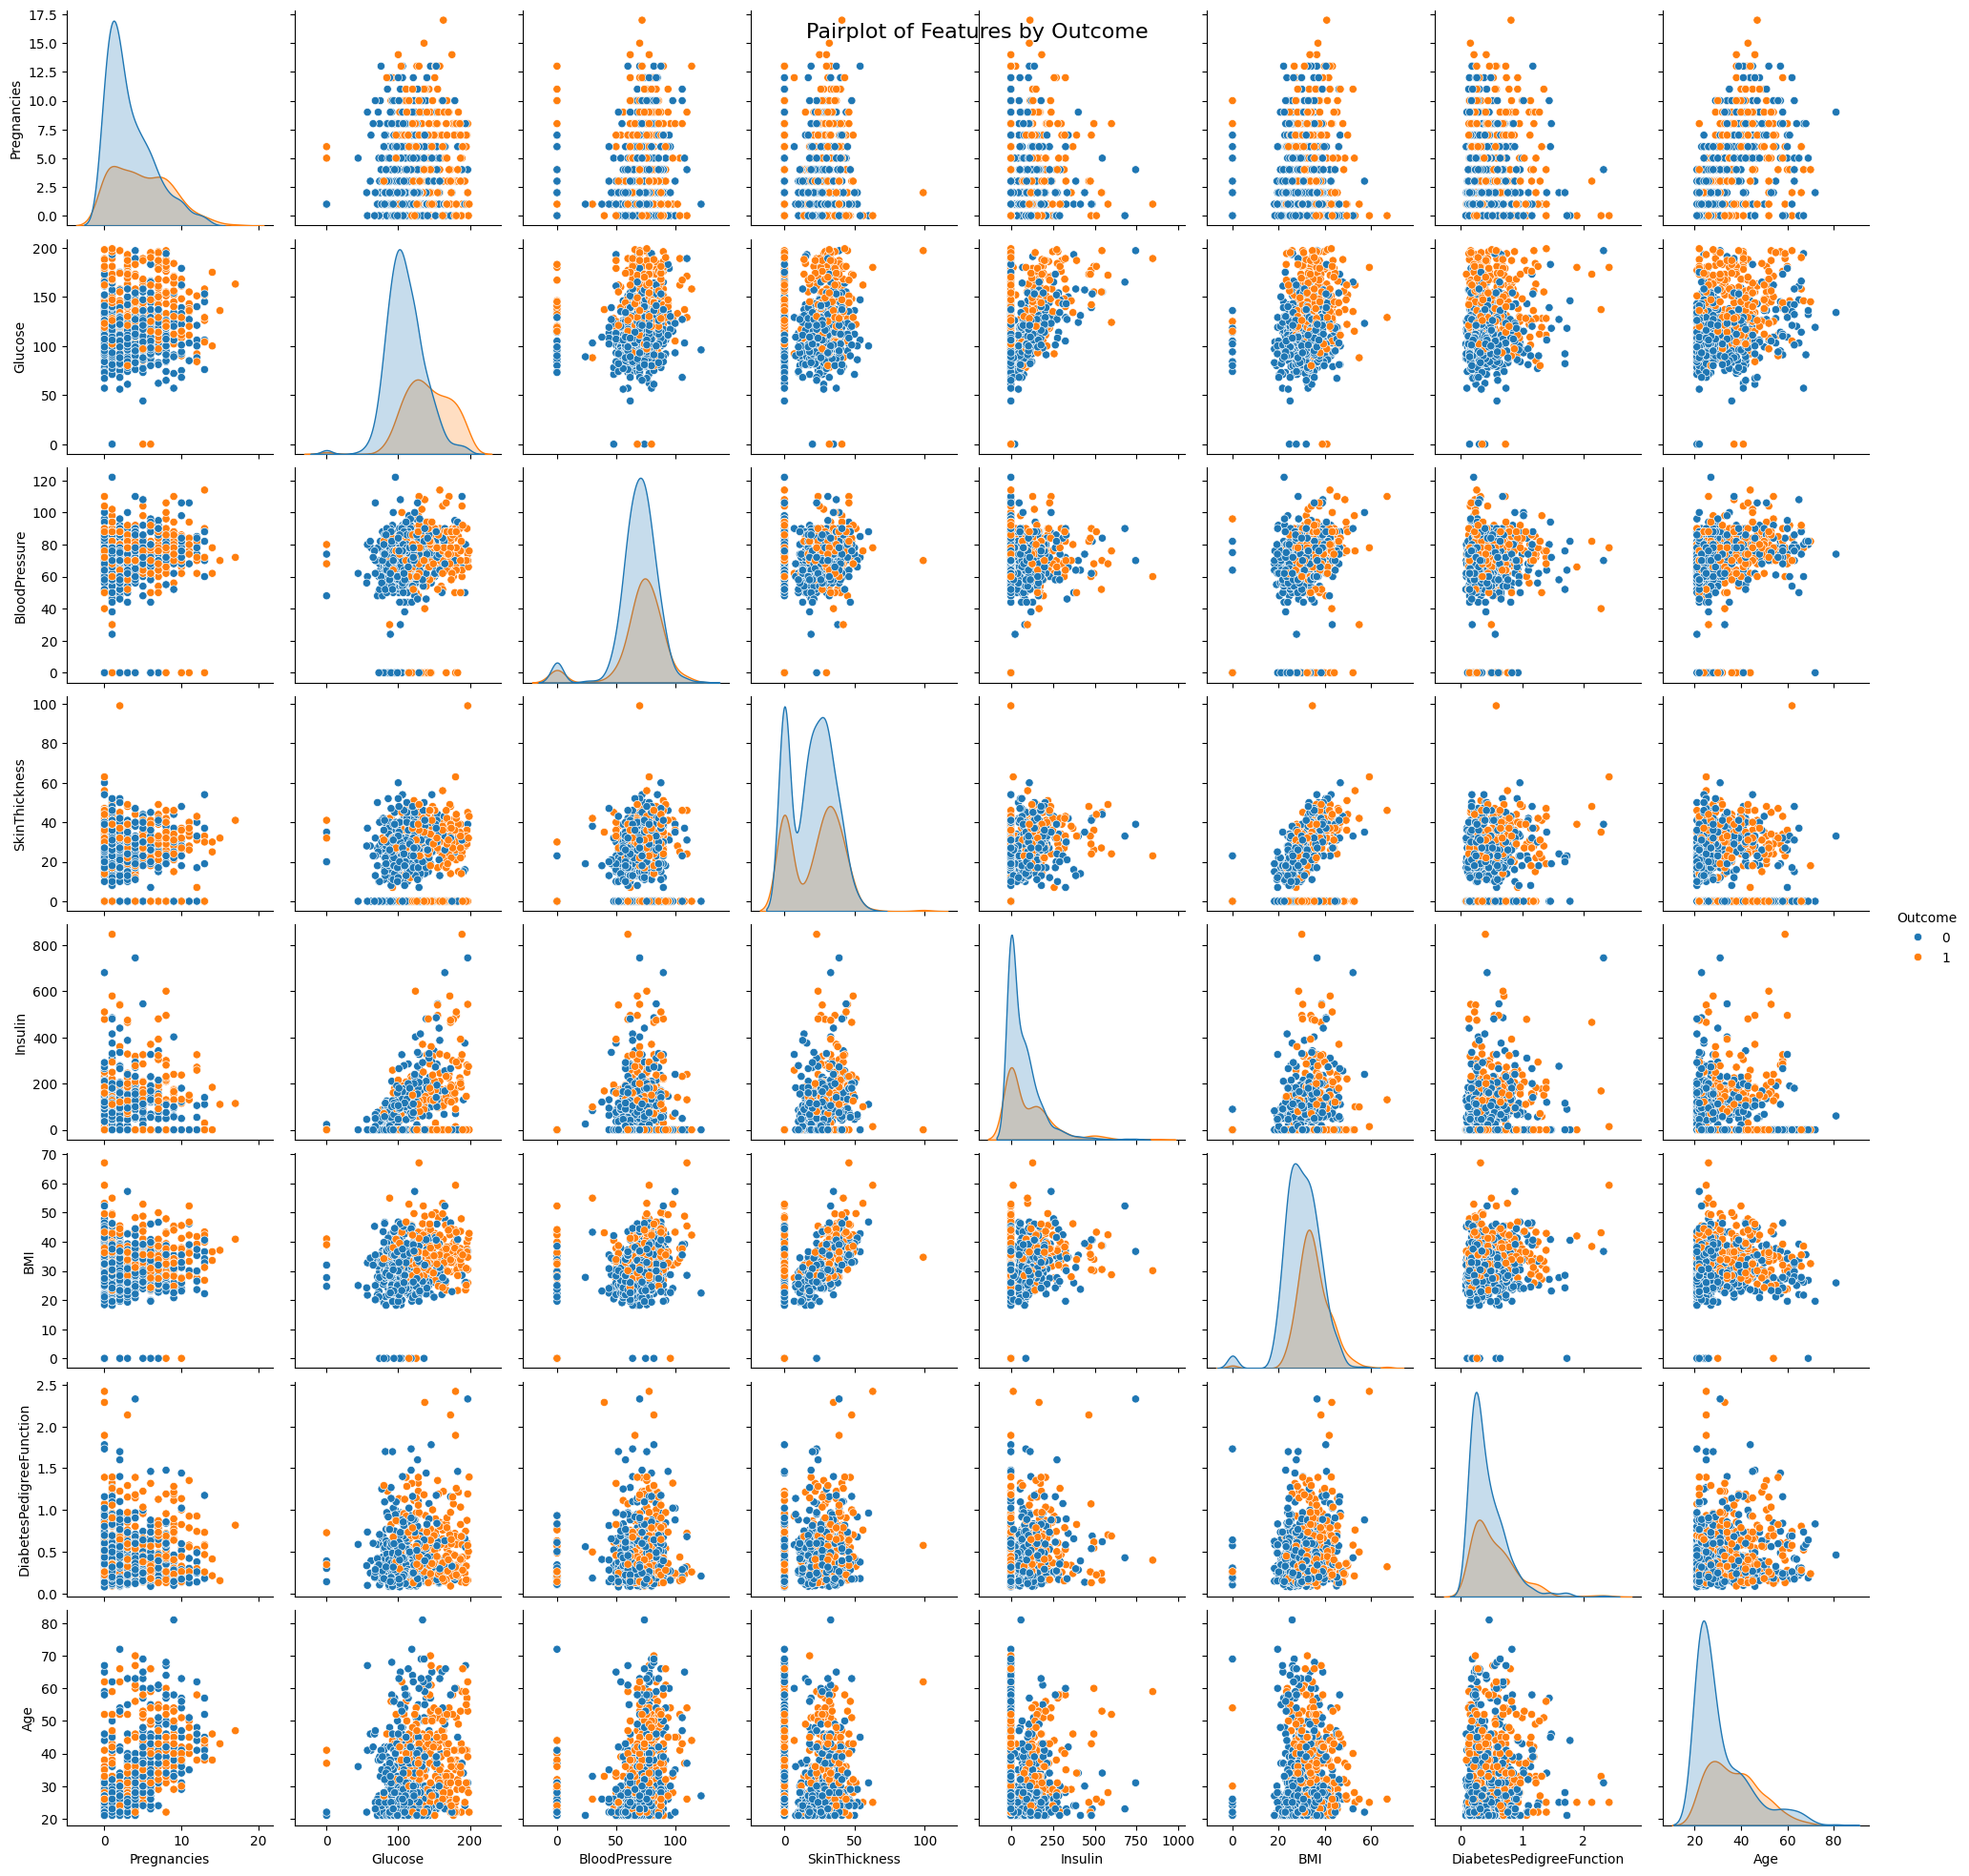

In [156]:
import seaborn as sns

# Define the features list explicitly (excluding Outcome)
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Plot pairwise feature comparisons using the original Data with Outcome included
sns.pairplot(Data[features + ['Outcome']], hue="Outcome", diag_kind="kde")
plt.suptitle("Pairplot of Features by Outcome", fontsize=16)
plt.show()



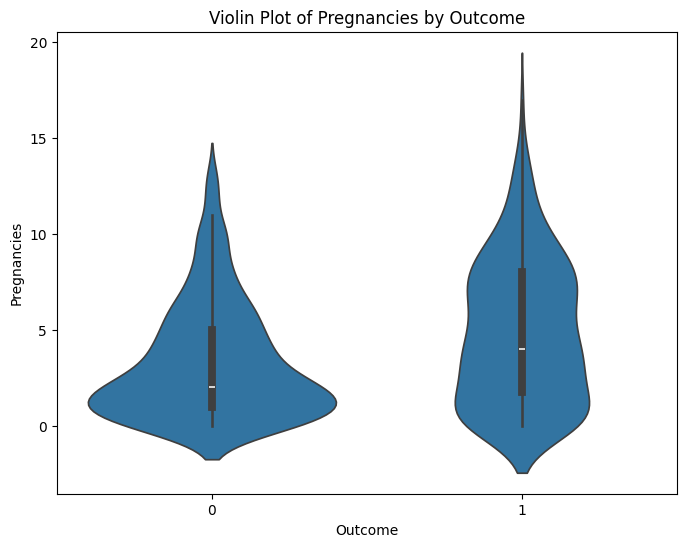

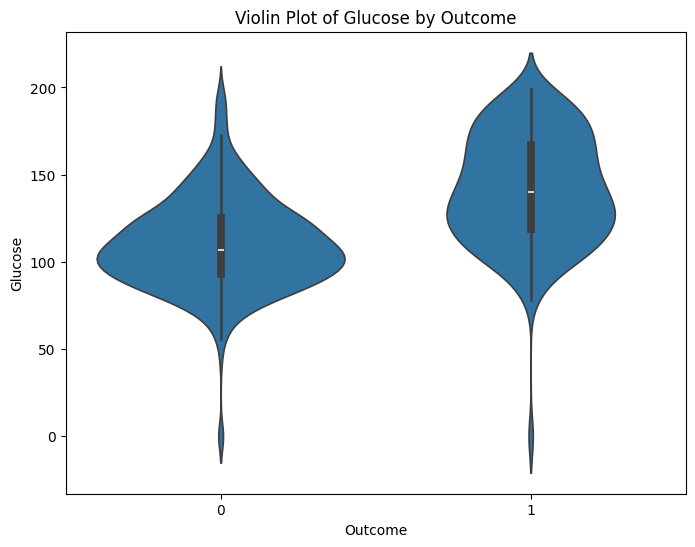

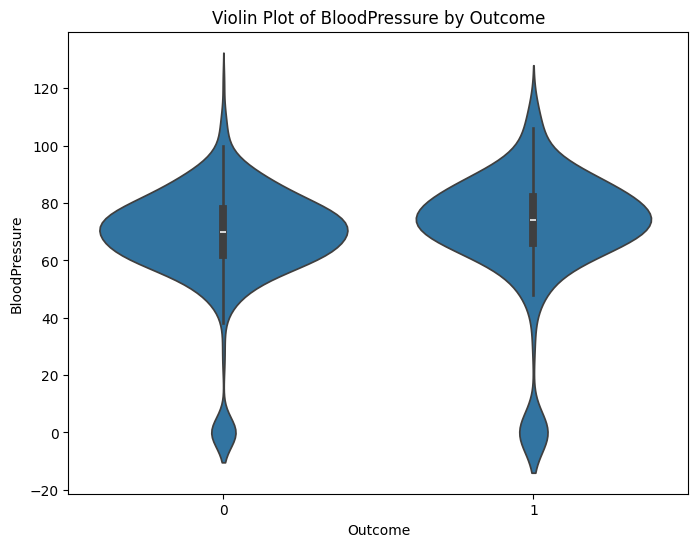

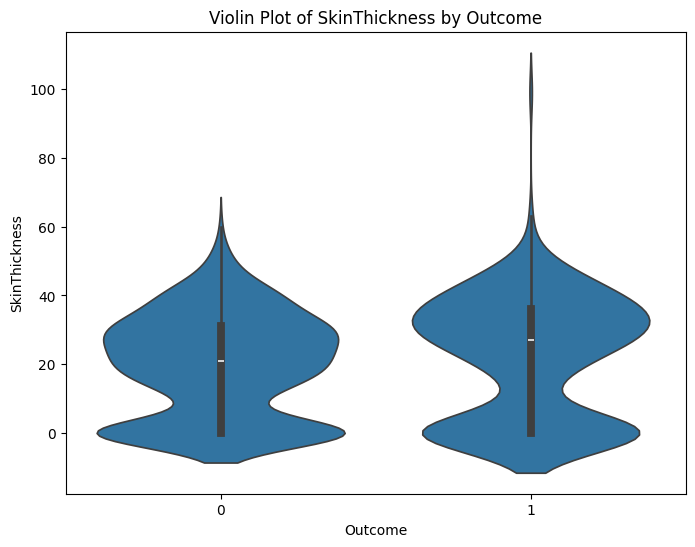

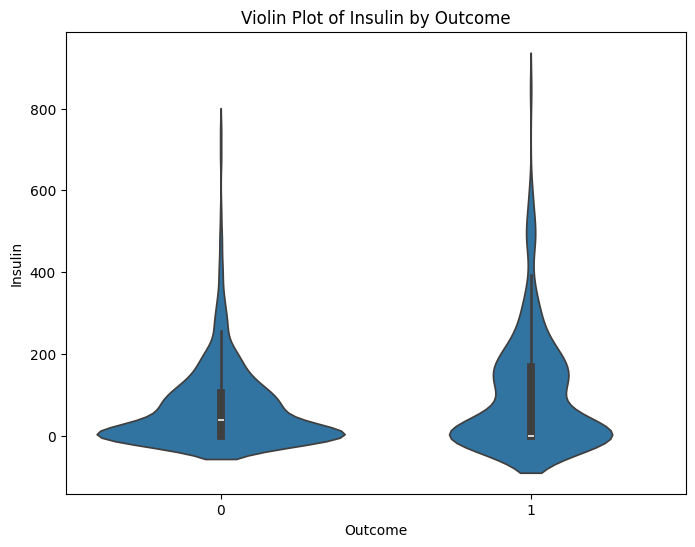

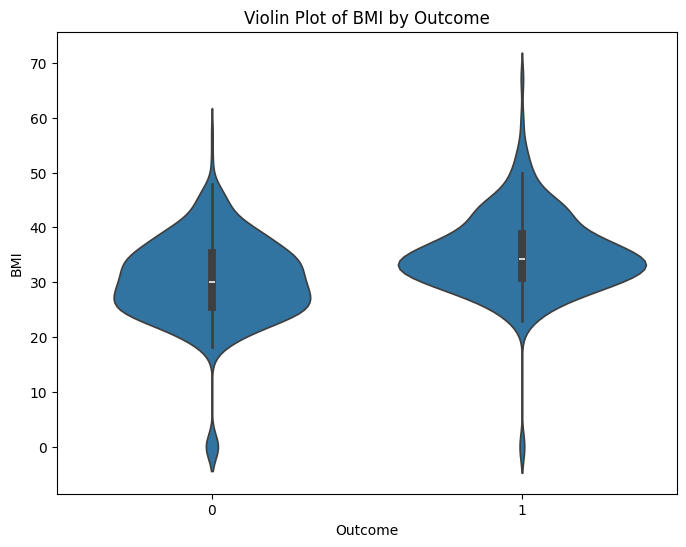

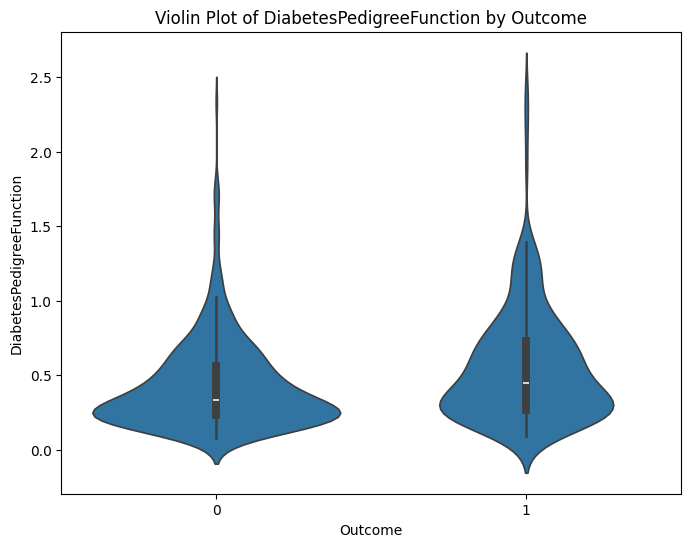

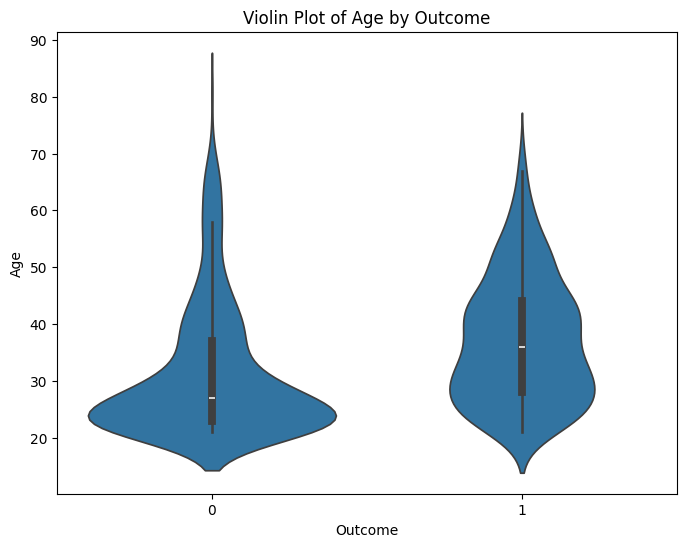

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of feature columns
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Plot violin plots using the original Data which includes Outcome
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=Data['Outcome'], y=Data[feature])
    plt.title(f"Violin Plot of {feature} by Outcome")
    plt.show()


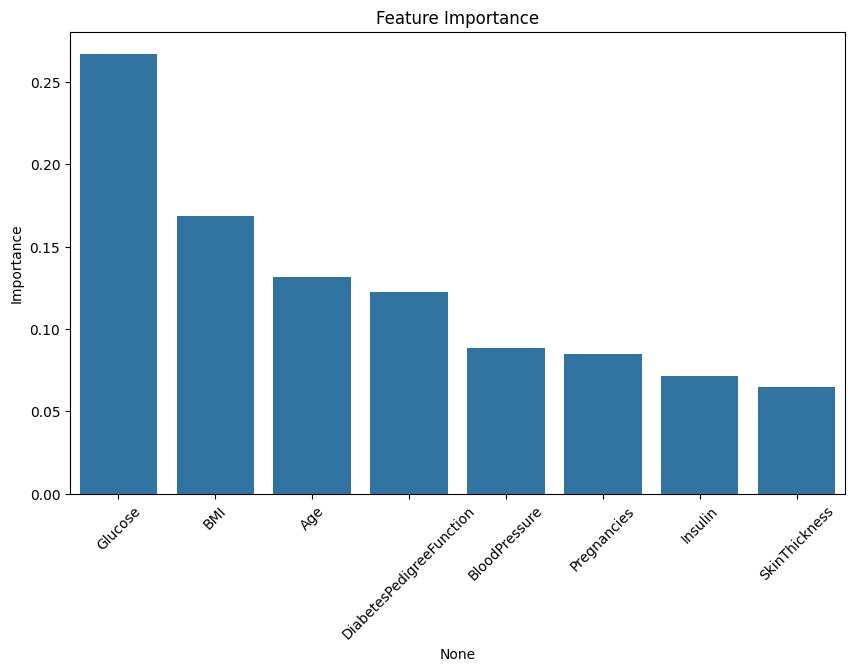

In [158]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and outcome variable
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = Data[features]  # Use original Data which includes Outcome
y = Data['Outcome']

# Train a random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Calculate feature importance
feature_importance = pd.DataFrame(rf_model.feature_importances_,
                                  index=features,
                                  columns=['Importance']).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index, y=feature_importance['Importance'])
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()
